# Mini Projeto de Análise de Dados

Vamos fazer um exemplo completo de pandas para um miniprojeto de análise de dados.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br> 
2. Qual foi o faturamento da empresa?<br> 
3. Qual o % de funcionários que já fechou algum contrato?<br>
4. Calcule o total de contratos que cada área da empresa já fechou
5. Calcule o total de funcionários por área
6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

funcionarios_df = pd.read_csv('Base de dados/CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('Base de dados/CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('Base de dados/BaseServiçosPrestados.xlsx')

#retirar colunas Estado Civil e Cargo da tabela de funcionarios
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)


### 1 - Folha Salarial

In [2]:
tot_impostos = funcionarios_df['Impostos'].sum()
tot_beneficios = funcionarios_df['Beneficios'].sum() + funcionarios_df['VT'].sum() + funcionarios_df['VR'].sum()
tot_salario = funcionarios_df['Salario Base'].sum()
folha_salarial = tot_salario + tot_beneficios + tot_impostos

print(f'A folha salarial da empresa é de R${folha_salarial:,.2f}')

A folha salarial da empresa é de R$2,717,493.22


### 2 - Faturamento da Empresa

In [3]:
faturamento_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')
faturamento_df['Faturamento Total'] = faturamento_df['Valor Contrato Mensal'] * faturamento_df['Tempo Total de Contrato (Meses)']

print(f'O faturamento total da empresa foi de R${sum(faturamento_df["Faturamento Total"]):,.2f}')

O faturamento total da empresa foi de R$5,519,160.00


### 3 - % Funcionários Fecharam Contrato

In [4]:
ffecharam_contrato = len(servicos_df['ID Funcionário'].unique())
funcionarios_total = len(funcionarios_df['ID Funcionário'].unique())
print(f'{ffecharam_contrato} funcionários fecharam contrato, representando {ffecharam_contrato / funcionarios_total:.2%} dos total de Funcionários da Empresa.')


99 funcionários fecharam contrato, representando 86.84% dos total de Funcionários da Empresa.


### 4 - Qtde Contratos por Área

Total de contratos fechados em determinadas áreas..,
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64



<AxesSubplot: >

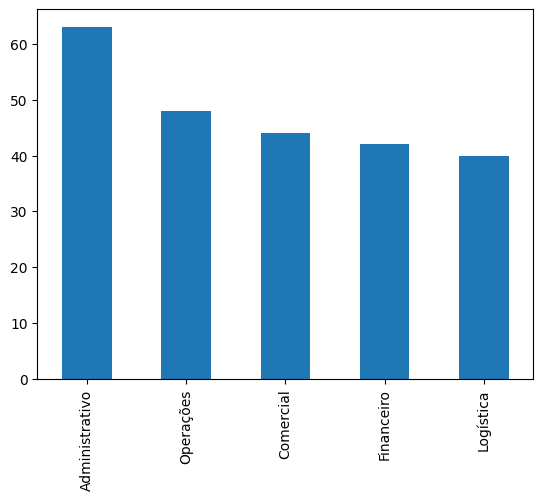

In [5]:
contratos_area_df = servicos_df[['ID Funcionário', 'Tempo Total de Contrato (Meses)']].merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
contratos_area_qtde = contratos_area_df['Area'].value_counts()
print(f'''Total de contratos fechados em determinadas áreas..,
{contratos_area_qtde}
''')
contratos_area_qtde.plot(kind='bar')

### 5 - Funcionários por Área

A quantidade de funcionários por Área é...
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


<AxesSubplot: >

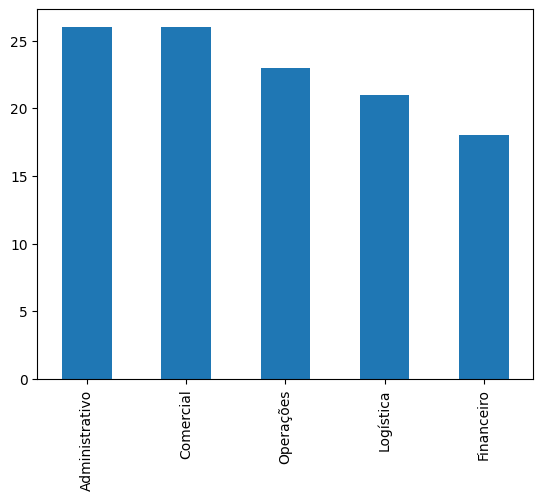

In [6]:
funcionarios_area = funcionarios_df['Area'].value_counts()
print('A quantidade de funcionários por Área é...')
print(funcionarios_area)
funcionarios_area.plot(kind='bar')


### 6 - Ticket Médio Mensal

In [7]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('O Ticket Médio Mensal é de R${:,.2f}'.format(ticket_medio))

O Ticket Médio Mensal é de R$2,502.56
